# SCIPY MATPLOTLIB Assignment 10

# 1. Temperature Max & Min Plotting and Fitting into a curve

In [271]:
from scipy import optimize
#max and min temperatures for each month of the year.
tmax = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
tmin = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
#Define the function required for curve_fit
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

#fitting the curve
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      tmax, [30, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      tmin, [21, 10, 0])

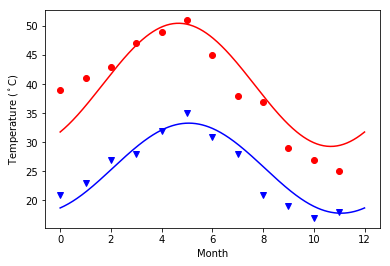

In [280]:
#Plotting of the data and the curve
days = np.linspace(0, 12, num=365)
#plot the max data in red dots
plt.plot(months, tmax, 'ro')
#plot the fitted curve for max data
plt.plot(days, yearly_temps(days, *res_max), 'r')
#plot the min data in blue dots
plt.plot(months, tmin, 'bv')
#plot the fitted curve for min data
plt.plot(days, yearly_temps(days, *res_min), 'b')
#set the labels for x & y
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# 2.Charts to plot: #a. Create a pie chart presenting the male/female proportion

In [81]:
import pandas as pd
#Read fromt the csv file
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

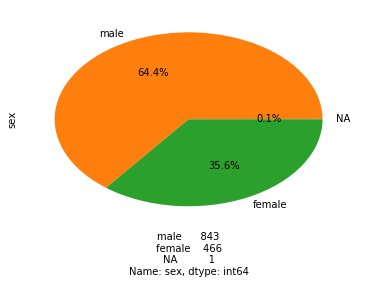

In [263]:
import matplotlib.pyplot as plt
#titanic.sex.value_counts(sort=False).plot.pie(autopct=titanic['sex'].value_counts())
titanic.sex.value_counts(sort=False).plot.pie(autopct='%.1f%%')
#set the label
plt.xlabel(titanic['sex'].value_counts())
plt.show()

# b. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

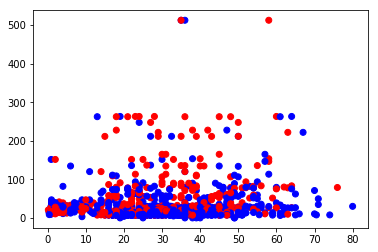

In [217]:
#set different color values for each of the gender values
color={'male':'b','female':'r','NA':'g'}
#Replace NaNs with 'NA' value
titanic.sex.fillna('NA',inplace=True)
#scatterplot with fare and age and different color by gender 
plt.scatter(titanic['age'],titanic['fare'],c=titanic['sex'].apply(lambda x:color[x]))
